# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys

sys.path.insert(0, '../_shared')
from data_parser import DataParser

# Data from xml

In [2]:
xml_files = ['A', 'B', 'C', 'D', 'E', 'F1', 'F2']

In [3]:
csv_path = '../_shared/data/synthetic-v2/data.csv'

# Keep in mind that the generated file could be too large to be pushed to GitHub
if not os.path.exists(csv_path):
    dataParser = DataParser()
    df = None
    for xml_file in xml_files:
        with open(f'../_shared/data/synthetic-v2/dataset{xml_file}.xml', 'r') as f:
            xml_string = f.read()
        if df is None:
            df = dataParser.convert_xml_to_dataframe(xml_string)
        else:
            df = pd.concat([df, dataParser.convert_xml_to_dataframe(xml_string)])
    df.to_csv(csv_path, index=False)

In [4]:
df = pd.read_csv(csv_path)
df.head()

,PATIENT_ID,GENDER_MALE,GENDER_FEMALE,BIRTH_DATE,AGE_RANGE_20,AGE_RANGE_40,AGE_RANGE_60,VISIT_DATE,VISIT_AGE,TREATING_PROVIDER_DENTIST,TREATING_PROVIDER_FACULTY,TREATING_PROVIDER_STUDENT,DDS_CODE_D4210,DDS_CODE_D4211,BLEEDING_ON_PROBING,NR_OF_POCKET,NR_OF_FURCATION,NR_OF_MOBILITY,TOTAL_LOSS_OF_ATTACHMENT_LEVEL,HAS_PARODONTITIS
0,5999800,1,0,12-3-2006,0,0,0,13-2-2009,2,1,0,0,0,0,0,0,0,0,0,0
1,5999800,1,0,12-3-2006,0,0,0,13-2-2009,2,0,1,0,0,0,0,0,0,0,0,0
2,5999800,1,0,12-3-2006,0,0,0,3-8-2009,3,1,0,0,0,0,0,0,0,0,0,0
3,5999800,1,0,12-3-2006,0,0,0,20-2-2010,3,0,1,0,0,0,0,0,0,0,0,0
4,5999800,1,0,12-3-2006,0,0,0,11-8-2010,4,0,0,1,0,0,0,0,0,0,0,0


# Data from csv

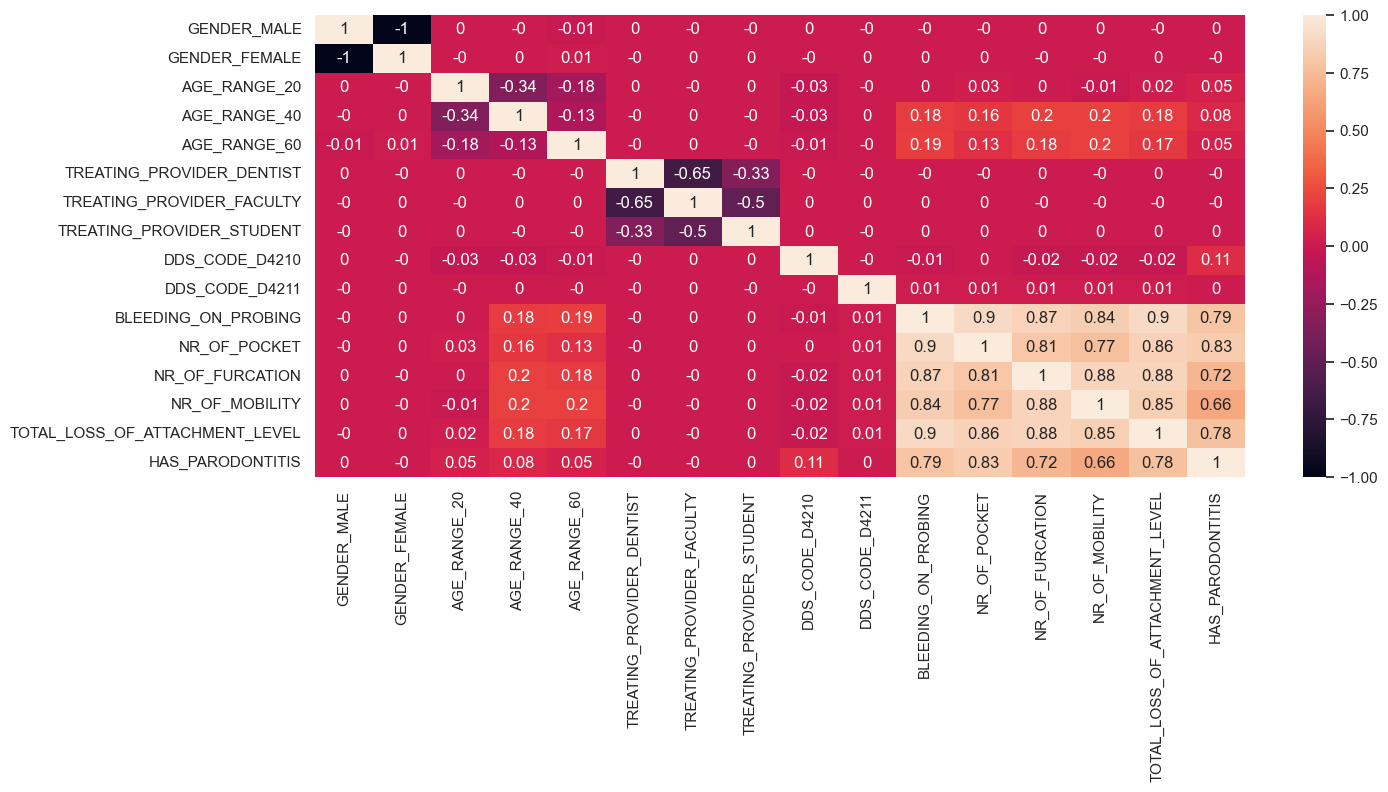

In [6]:
df = df[[
    # 'PATIENT_ID',
    'GENDER_MALE',
    'GENDER_FEMALE',
    # 'BIRTH_DATE',
    'AGE_RANGE_20',
    'AGE_RANGE_40',
    'AGE_RANGE_60',
    # 'VISIT_DATE',
    'TREATING_PROVIDER_DENTIST',
    'TREATING_PROVIDER_FACULTY',
    'TREATING_PROVIDER_STUDENT',
    'DDS_CODE_D4210',
    'DDS_CODE_D4211',
    'BLEEDING_ON_PROBING',
    'NR_OF_POCKET',
    'NR_OF_FURCATION',
    'NR_OF_MOBILITY',
    'TOTAL_LOSS_OF_ATTACHMENT_LEVEL',
    'HAS_PARODONTITIS'
]]

# Visualizing a Pandas Correlation Matrix Using Seaborn
matrix = df.corr().round(2)
sns.set(rc={'figure.figsize': (15, 6)})
sns.heatmap(matrix, annot=True)
plt.show()